In [2]:
import numpy as np
import seaborn as sns
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 1. Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))

In [4]:
# Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))
df =sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
df.describe(include='all', percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
10%,14.000000,4.000000,90.000000,67.000000,1988.500000,12.000000,71.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN


In [8]:
df.shape

(398, 9)

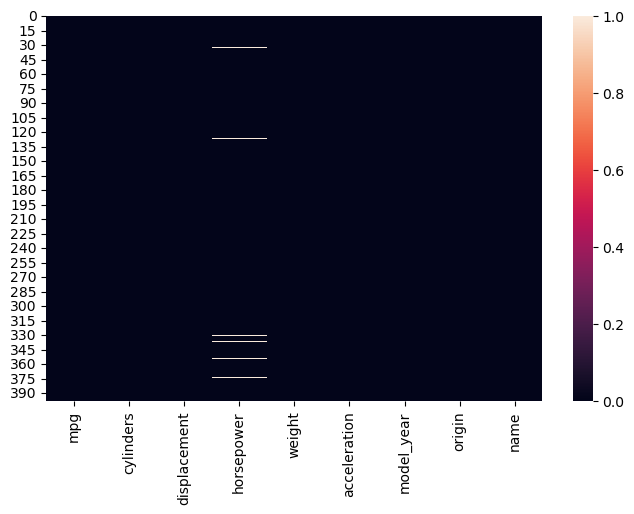

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isna())
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Набор данных MPG содержит информацию о милях на галлон для различных моделей автомобилей и их атрибутах. Он включает такие характеристики, как мили на галлон, количество цилиндров в двигателе, рабочий объем двигателя, мощность двигателя, вес автомобиля, ускорение, год выпуска модели, происхождение автомобиля и название модели автомобиля.

Особенности и характеристики
  * mpg : миль на галлон (числовое значение)
  * цилиндры : Количество цилиндров в двигателе (числовое)
  * объем : объем двигателя в кубических дюймах (числовой)
  * лошадиная сила : Мощность двигателя в лошадиных силах (числовая)
  * вес : Вес транспортного средства в фунтах (числовой)
  * ускорение : Ускорение в секундах от 0 до 60 миль/ч (числовое)
  * model_year : Год выпуска модели (категориальный)
  * origin : Происхождение автомобиля (1 = американское, 2 = европейское, 3 = японское) (категориальное)
  * имя : Название модели автомобиля (строка)

# 2. Посчитайте количество строк и столбцов

In [ ]:

print(f'Количество столбцов в наборе: {len(df.columns)}')
print(f'Количество строк в наборе: {len(df)}')

# 3. Проведите разведочный анализ

То есть:
  * для каждой числовой переменной вычислите:
      * Долю пропусков
      * Максимальное и минимальное значение
      * Среднее значение
      * Медиану
      * Дисперсию
      * Квантиль 0.1 и 0.9
      * Квартиль 1 и 3
  * для каждой категориальной переменной вычислите:
      * Долю пропусков
      * Количество уникальных значений
      * Моду

Для большинства столбцов отношение к числовым или категориальным переменным можно сделать по типу данных.
Особым образом стоит рассмотреть столбец model_year. По сути это своеобразная шкала времени. И этот столбец можно рассматривать и как числовой, и как категориальный - зависит от задачи.

In [ ]:
numdt = ['float64', 'int64']

for column in df.columns:
    print(f"Столбец '{column}':")
    column_type = df[column].dtype
    if column_type in numdt:
        print(f"  Тип: {df.dtypes.loc[column]}, числовой")
        print(f"  Доля пропусков: {len(df[df[column].isna()])/len(df)}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  Минимальное значение: {df[column].min()}")    
        print(f"  Среднее значение:  {df[column].mean()}")
        print(f"  Медиана:  {df[column].median()}")
        print(f"  Дисперсия:  {df[column].var()}")
        print(f"  Квантиль 0.1:  {df[column].quantile(q=0.1)}")
        print(f"  Квантиль 0.9:  {df[column].quantile(q=0.9)}")
        print(f"  Квартиль 1:  {df[column].quantile(q=0.25)}")
        print(f"  Квартиль 3:  {df[column].quantile(q=0.75)}")
    if column_type not in numdt or column == 'model_year':
        print(f"  Тип: {df.dtypes.loc[column]}, категориальный")
        print(f"  Доля пропусков: {len(df[df[column].isna()])/len(df)}")
        print(f"  Количество уникальных значений: {len(df[column].unique())}")
        print(f"  Мода: {df[column].mode()}")

# 3. Сформулируйте и проверьте минимум 2 статистические гипотезы. 

Выбор критериев для проверки гипотез требуется обосновать. Сделать выводы в терминах предметной области.

Гипотезы:
1. Чем более свежий модельный год выпуска (model_year), тем больше миль на галлон (mpg). Т.е. с течением времени повышается эффективностью
2. Американские автомобили имеют больший объем двигателя. Есть такое мнение :)
3. Чем больше объем двигателя, тем выше ускорение. Ускорение во многом зависит от крутящего момента, который, в свою очередь, во многом зависит от объема двигателя, т.к. объем двигателя определяет объем топлива, сгораемого в моменте.
4. Чем меньше отношение вес/объем - тем выше ускорение. Т.е. 1см3 топлива приходится "толкать" меньший вес.
5. Чем меньше отношение вес/лошадиная сила - тем выше ускорение. 

## 3.1. Чем более свежий модельный год выпуска (model_year), тем больше миль на галлон (mpg). 

Т.е. с течением времени повышается эффективностью

## 3.2. Американские автомобили имеют больший объем двигателя. 

Есть такое мнение :)

## 3.3. Чем больше объем двигателя, тем выше ускорение. 

Ускорение во многом зависит от крутящего момента, который, в свою очередь, во многом зависит от объема двигателя, т.к. объем двигателя определяет объем топлива, сгораемого в моменте.

H0: При увеличении объема двигателя ускорение не растет
H1: При увеличении объема двигателя ускорение растет

In [ ]:
d = df[['displacement', 'acceleration', 'horsepower', 'weight']].dropna()
d['num']=d.index
d['weight_displacement'] = d['weight'] / d['displacement']
d['weight_horsepower'] = d['weight'] / d['horsepower']
#d = d.sample(frac=1).reset_index(drop=True)
#d.loc[:(len(d)/2-1)]
d

In [ ]:
#column1 = 'displacement'
#column1 = 'weight_displacement'
#column1 = 'horsepower'
column1 = 'weight_horsepower'
column2 = 'acceleration'

statistic, pvalue = scipy.stats.pearsonr(d[column1], d[column2])
statistic = round(statistic, 3)
pvalue = round(pvalue, 3)
print(f'Коэффициент Пирсона: {statistic}')
print(f'p-value: {pvalue}')

statistic, pvalue = scipy.stats.spearmanr(d[column1], d[column2])
print(f'Коэффициент Спирмана: {statistic}')
print(f'p-value: {pvalue}')

statistic, pvalue = scipy.stats.kendalltau(d[column1], d[column2])
print(f'Коэффициент Кендалла: {statistic}')
print(f'p-value: {pvalue}')

## 3.4. Чем меньше отношение вес/объем - тем выше ускорение. 

Т.е. 1см3 топлива приходится "толкать" меньший вес.

## 3.5. Чем меньше отношение вес/лошадиная сила - тем выше ускорение. 

## 3.6. Корелляция между объемом и лошадиными силами есть, но слабая.

# 4. Реализуйте стохастический и обычный градиентный спуск вручную для этих данных:y=’mpg’ иx=’horsepower’ и ’weight’

In [69]:
df_mpg_weight = df[['mpg', 'weight']]
df_mpg_weight[['mpg_minmax', 'weight_minmax']]  = preprocessing.MinMaxScaler().fit_transform(df[['mpg', 'weight']])

<Axes: >

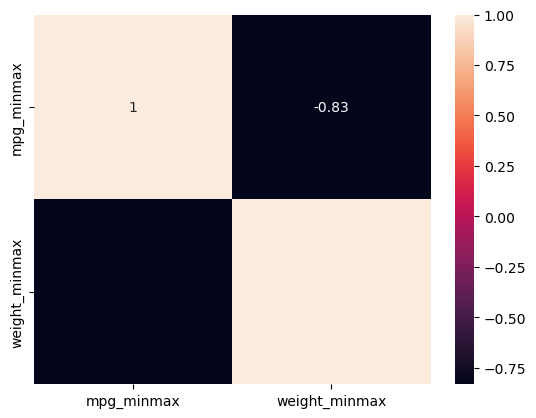

In [30]:
sns.heatmap(df_mpg_weight[['mpg_minmax', 'weight_minmax']].corr( numeric_only = True),annot=True)

<Axes: xlabel='weight', ylabel='mpg'>

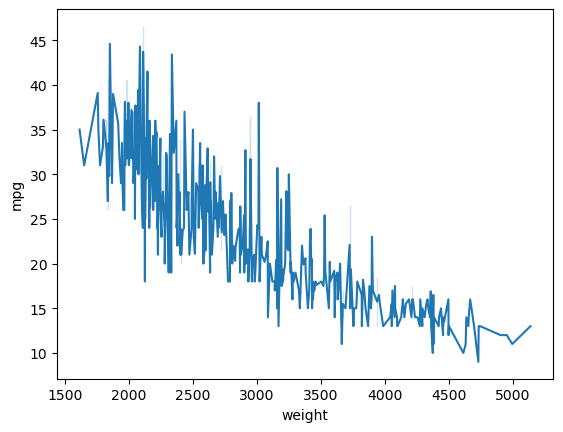

In [77]:
sns.lineplot(y='mpg',x='weight', data=df_mpg_weight)

<Axes: xlabel='weight_minmax', ylabel='mpg_minmax'>

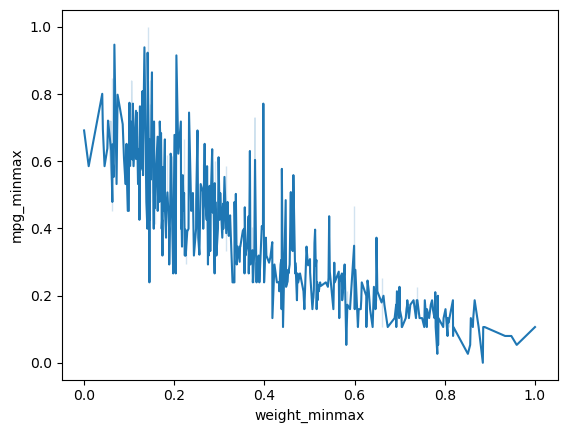

In [36]:
sns.lineplot(y='mpg_minmax',x='weight_minmax', data=df_mpg_weight)

## 4.1 Стохастический градиентный спуск с х=horsepower

In [40]:
def my_sgd(x, y, x_orig, y_orig,interation, seed, learning_rate):
    np.random.seed(seed)
    # Начальные значения параметров
    a_n = np.random.randn()
    b_n = np.random.randn()
    m = len(x)
    #print(f'a_n={a_n}, b_n={b_n}')

    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]
    
    # Стохастический градиентный спуск
    for i in range(interation):
        rand_index = np.random.randint(m)
        x_i = x[rand_index]
        y_i = y[rand_index]
        y_pred = a_n * x_i + b_n
        error = y_pred - y_i
        a_gradient = 2 * x_i * error
        b_gradient = 2 * error
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)
        print(f'rand_index={rand_index}, x_i={x_i}, y_i={y_i}, x_orig_i={x_orig[rand_index]}, y_orig_i={y_orig[rand_index]}')

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a_n * x + b_n, color='red', label='Regression line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)
    
    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * x + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)
    
    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')
    
    plt.tight_layout()
    plt.show()

rand_index=311, x_i=0.6143617021276596, y_i=0.1437482279557698, x_orig_i=2120, y_orig_i=32.1
rand_index=37, x_i=0.2393617021276596, y_i=0.4749078537000283, x_orig_i=3288, y_orig_i=18.0
rand_index=347, x_i=0.7446808510638298, y_i=0.10263680181457335, x_orig_i=1975, y_orig_i=37.0
rand_index=161, x_i=0.18617021276595744, y_i=0.6475758434930535, x_orig_i=3897, y_orig_i=16.0
rand_index=54, x_i=0.6914893617021276, y_i=0.0, x_orig_i=1613, y_orig_i=35.0
rand_index=368, x_i=0.4787234042553191, y_i=0.29118230791040545, x_orig_i=2640, y_orig_i=27.0
rand_index=35, x_i=0.2127659574468085, y_i=0.4865324638502977, x_orig_i=3329, y_orig_i=17.0
rand_index=174, x_i=0.2393617021276596, y_i=0.3887156223419337, x_orig_i=2984, y_orig_i=18.0
rand_index=350, x_i=0.6835106382978724, y_i=0.17068330025517442, x_orig_i=2215, y_orig_i=34.7
rand_index=317, x_i=0.6728723404255318, y_i=0.16302806918060675, x_orig_i=2188, y_orig_i=34.3
rand_index=94, x_i=0.10638297872340427, y_i=0.8851715338814857, x_orig_i=4735, y_or

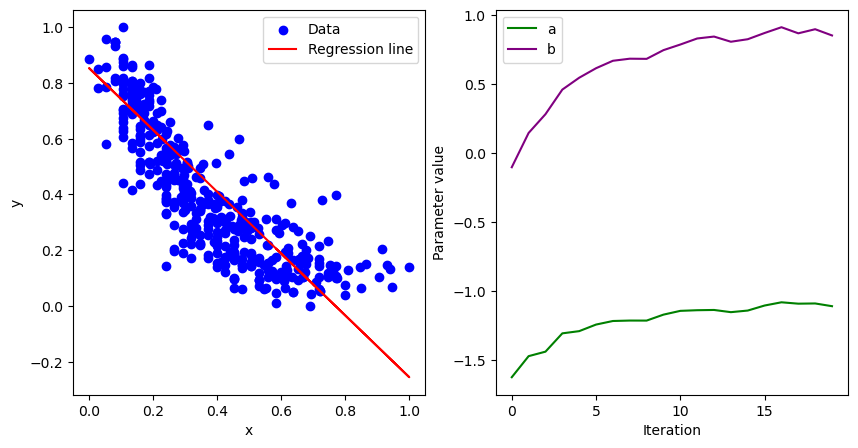

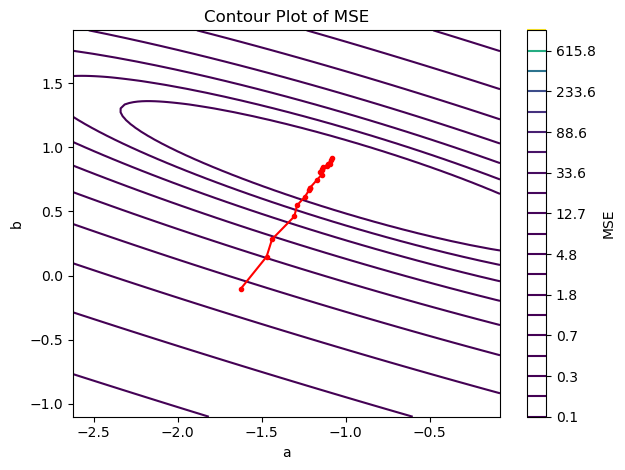

In [75]:
my_sgd(df_mpg_weight["mpg_minmax"], df_mpg_weight["weight_minmax"], 
       df_mpg_weight["weight"], df_mpg_weight["mpg"],
       interation=19, seed=55, learning_rate=0.1)

## 4.2 Градиентный спуск

In [83]:
def my_gd(x, y, x_orig, y_orig, n_interation=0.1, seed=42, learning_rate=20):
    # Начальные значения параметров
    a_n = np.random.randn(1)
    b_n = np.random.randn(1)
    learning_rate = 0.1
    n_iterations = 20
    m = len(x)

    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]

    # Градиентный спуск
    for iteration in range(n_iterations):
        y_pred = a_n * x + b_n
        error = y_pred - y
        a_gradient = 2/m * np.sum(x * error)
        b_gradient = 2/m * np.sum(error)
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)
        print(f'rand_index={rand_index}, x_i={x_i}, y_i={y_i}, x_orig_i={x_orig[rand_index]}, y_orig_i={y_orig[rand_index]}')

    plt.figure(figsize=(10, 5))


    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a_n * x + b_n, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(5, 5))
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)

    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * x + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)

    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')

    plt.show()

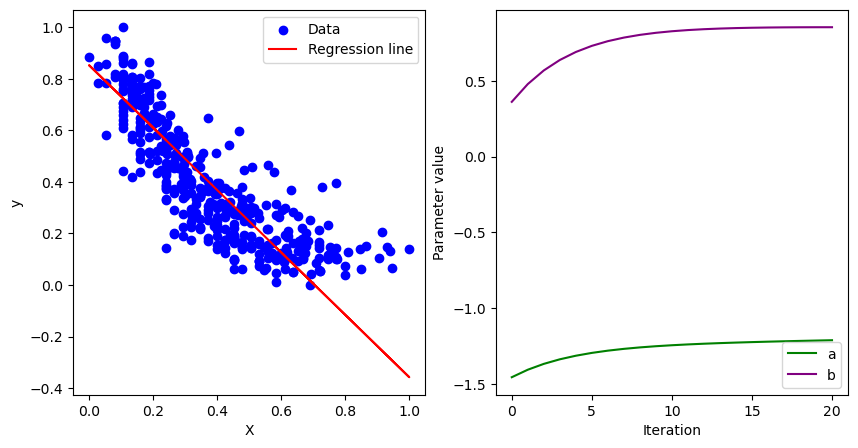

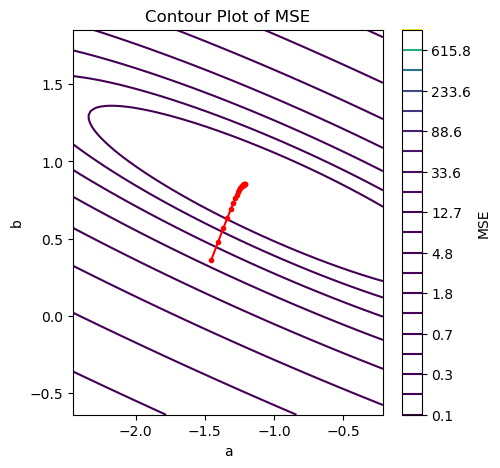

In [85]:
my_gd(df_mpg_weight["mpg_minmax"], df_mpg_weight["weight_minmax"], 
      df_mpg_weight["weight"], df_mpg_weight["mpg"],
      n_interation=19, seed=25, learning_rate=0.1)

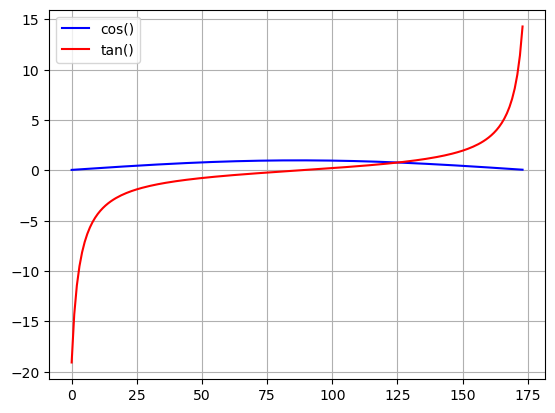

In [155]:
radians =np.deg2rad(range(-87,87))
plt.plot(np.cos(radians), color="blue", label="cos()")
plt.plot(np.tan(radians), color="red", label="tan()")
plt.legend()
plt.grid()